# Predicting whether a tumour is cancerous

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('cancer_classification.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [7]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [10]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


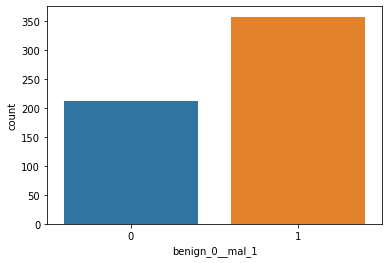

In [12]:
sns.countplot(x='benign_0__mal_1',data=df)

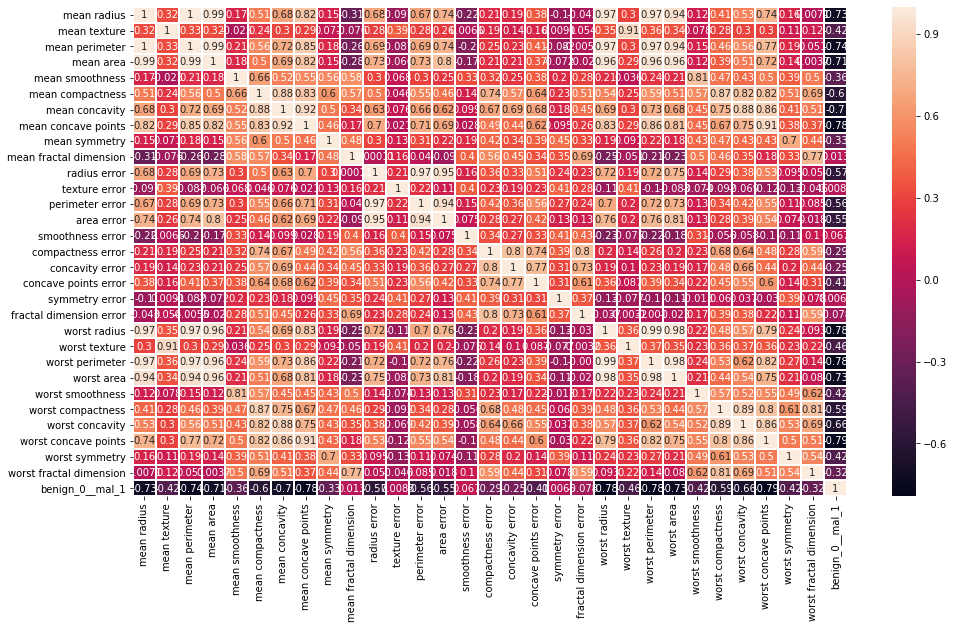

In [17]:
df.corr()
plt.figure(1,figsize=(16,9))
sns.heatmap(data=df.corr(),annot=True,linewidth=1)

In [19]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.25,random_state=101)

In [23]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [25]:
from tensorflow.keras.models import Sequential

In [27]:
from tensorflow.keras.layers import Dense,Dropout

In [30]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [31]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 3ms/sample - loss: 0.6913 - val_loss: 0.6768
Epoch 2/600
426/426 [==============================] - 0s 44us/sample - loss: 0.6602 - val_loss: 0.6491
Epoch 3/600
426/426 [==============================] - 0s 42us/sample - loss: 0.6296 - val_loss: 0.6185
Epoch 4/600
426/426 [==============================] - 0s 40us/sample - loss: 0.5959 - val_loss: 0.5814
Epoch 5/600
426/426 [==============================] - 0s 40us/sample - loss: 0.5534 - val_loss: 0.5349
Epoch 6/600
426/426 [==============================] - 0s 40us/sample - loss: 0.5028 - val_loss: 0.4745
Epoch 7/600
426/426 [==============================] - 0s 37us/sample - loss: 0.4420 - val_loss: 0.4120
Epoch 8/600
426/426 [==============================] - 0s 40us/sample - loss: 0.3854 - val_loss: 0.3566
Epoch 9/600
426/426 [========

426/426 [==============================] - 0s 47us/sample - loss: 0.0392 - val_loss: 0.1154
Epoch 153/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0373 - val_loss: 0.1188
Epoch 154/600
426/426 [==============================] - 0s 42us/sample - loss: 0.0396 - val_loss: 0.1171
Epoch 155/600
426/426 [==============================] - 0s 44us/sample - loss: 0.0390 - val_loss: 0.1239
Epoch 156/600
426/426 [==============================] - 0s 42us/sample - loss: 0.0366 - val_loss: 0.1095
Epoch 157/600
426/426 [==============================] - 0s 47us/sample - loss: 0.0370 - val_loss: 0.1179
Epoch 158/600
426/426 [==============================] - 0s 44us/sample - loss: 0.0367 - val_loss: 0.1101
Epoch 159/600
426/426 [==============================] - 0s 40us/sample - loss: 0.0381 - val_loss: 0.1150
Epoch 160/600
426/426 [==============================] - 0s 44us/sample - loss: 0.0371 - val_loss: 0.1182
Epoch 161/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 42us/sample - loss: 0.0301 - val_loss: 0.1217
Epoch 307/600
426/426 [==============================] - 0s 42us/sample - loss: 0.0302 - val_loss: 0.1206
Epoch 308/600
426/426 [==============================] - 0s 49us/sample - loss: 0.0299 - val_loss: 0.1274
Epoch 309/600
426/426 [==============================] - 0s 66us/sample - loss: 0.0344 - val_loss: 0.1206
Epoch 310/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0366 - val_loss: 0.1267
Epoch 311/600
426/426 [==============================] - 0s 44us/sample - loss: 0.0293 - val_loss: 0.1291
Epoch 312/600
426/426 [==============================] - 0s 44us/sample - loss: 0.0260 - val_loss: 0.1199
Epoch 313/600
426/426 [==============================] - 0s 56us/sample - loss: 0.0320 - val_loss: 0.1242
Epoch 314/600
426/426 [==============================] - 0s 44us/sample - loss: 0.0278 - val_loss: 0.1250
Epoch 315/600
426/426 [==============================] - 0s 

426/426 [==============================] - 0s 35us/sample - loss: 0.0154 - val_loss: 0.1538
Epoch 461/600
426/426 [==============================] - 0s 40us/sample - loss: 0.0147 - val_loss: 0.1443
Epoch 462/600
426/426 [==============================] - 0s 40us/sample - loss: 0.0149 - val_loss: 0.1454
Epoch 463/600
426/426 [==============================] - 0s 35us/sample - loss: 0.0163 - val_loss: 0.1603
Epoch 464/600
426/426 [==============================] - 0s 35us/sample - loss: 0.0163 - val_loss: 0.1450
Epoch 465/600
426/426 [==============================] - 0s 35us/sample - loss: 0.0146 - val_loss: 0.1487
Epoch 466/600
426/426 [==============================] - 0s 41us/sample - loss: 0.0157 - val_loss: 0.1564
Epoch 467/600
426/426 [==============================] - 0s 35us/sample - loss: 0.0173 - val_loss: 0.1425
Epoch 468/600
426/426 [==============================] - 0s 35us/sample - loss: 0.0191 - val_loss: 0.1653
Epoch 469/600
426/426 [==============================] - 0s 

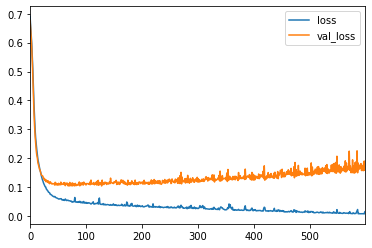

In [35]:
losses = pd.DataFrame(model.history.history)
losses.plot()

In [55]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [56]:
from tensorflow.keras.callbacks import EarlyStopping

In [57]:
early_stop =  EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=25)

In [58]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 0s 744us/sample - loss: 0.6939 - val_loss: 0.6694
Epoch 2/600
426/426 [==============================] - 0s 44us/sample - loss: 0.6557 - val_loss: 0.6351
Epoch 3/600
426/426 [==============================] - 0s 44us/sample - loss: 0.6219 - val_loss: 0.6008
Epoch 4/600
426/426 [==============================] - 0s 42us/sample - loss: 0.5869 - val_loss: 0.5632
Epoch 5/600
426/426 [==============================] - 0s 47us/sample - loss: 0.5476 - val_loss: 0.5210
Epoch 6/600
426/426 [==============================] - 0s 47us/sample - loss: 0.5034 - val_loss: 0.4734
Epoch 7/600
426/426 [==============================] - ETA: 0s - loss: 0.492 - 0s 44us/sample - loss: 0.4562 - val_loss: 0.4227
Epoch 8/600
426/426 [==============================] - 0s 54us/sample - loss: 0.4089 - val_loss: 0.3750
Epoch 9/600
426/426 [==============================] - 0s 44us/sample - loss: 0.3611 - val_loss: 

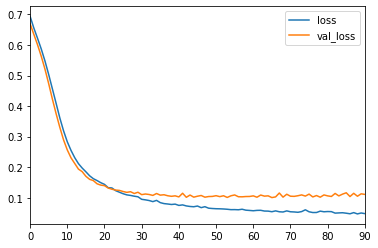

In [59]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [60]:
model = Sequential()
model.add(Dense(30,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(15,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam')

In [61]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test),callbacks=[early_stop])

Train on 426 samples, validate on 143 samples
Epoch 1/600
426/426 [==============================] - 1s 1ms/sample - loss: 0.7221 - val_loss: 0.6757
Epoch 2/600
426/426 [==============================] - 0s 49us/sample - loss: 0.6827 - val_loss: 0.6525
Epoch 3/600
426/426 [==============================] - 0s 52us/sample - loss: 0.6597 - val_loss: 0.6292
Epoch 4/600
426/426 [==============================] - 0s 52us/sample - loss: 0.6377 - val_loss: 0.6055
Epoch 5/600
426/426 [==============================] - 0s 47us/sample - loss: 0.6069 - val_loss: 0.5780
Epoch 6/600
426/426 [==============================] - 0s 54us/sample - loss: 0.5864 - val_loss: 0.5479
Epoch 7/600
426/426 [==============================] - 0s 51us/sample - loss: 0.5644 - val_loss: 0.5091
Epoch 8/600
426/426 [==============================] - 0s 52us/sample - loss: 0.5280 - val_loss: 0.4613
Epoch 9/600
426/426 [==============================] - 0s 61us/sample - loss: 0.4736 - val_loss: 0.4162
Epoch 10/600
426/42

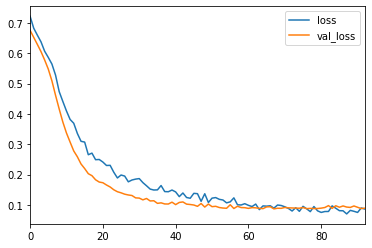

In [62]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [68]:
predictions = model.predict_classes(X_test)

In [69]:
from sklearn.metrics import classification_report,confusion_matrix

In [70]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.96      0.96      0.96        55
           1       0.98      0.98      0.98        88

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143

